In [1]:
import requests
from urllib import parse
import xmltodict
import pandas as pd

In [2]:
## openapi를 이용하여 서버와의 통신하여 데이터를 가져오는 작업

## 어느 서버에서 데이터를 가져와야되는지 주소를 입력
url = "http://openapi.data.go.kr/openapi/service/rest/Covid19/getCovid19InfStateJson"

## 공공데이터포털에서 주소와 함께 request parameter
## 서비스키
service_key = "dtbWOdJ%2FCz5HE0DGLU%2BCRPe7pOW0NIQBUcGEqsHZaTRiYCI%2F5%2BzugwzQjcvuId7NPdg6rUiW%2Bft3fm7yqyD4pw%3D%3D"
## 페이지번호
## 페이지당 데이터의 개수
## 시작 시간
## 종료 시간
param = {
    'serviceKey' : parse.unquote(service_key), 
    'pageNo' : '1', 
    'numOfRows' : '5000', 
    'startCreateDt' : '20200101', 
    'endCreateDt' : '20230407'
}


## 여기부터 통신을 시작
response = requests.get(url, params = param)
## response의 데이터의 형태는 xml

## xml데이터를 딕셔너리 형태의 데이터로 변환
result = xmltodict.parse(response.content)

print(result)


{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL SERVICE.'}, 'body': {'items': {'item': [{'createDt': '2023-04-07 00:16:52.0', 'deathCnt': '34318', 'decideCnt': '30894559', 'seq': '1218', 'stateDt': '20230407', 'stateTime': '00:00', 'updateDt': 'null'}, {'createDt': '2023-04-05 02:12:00.0', 'deathCnt': '34296', 'decideCnt': '30871740', 'seq': '1216', 'stateDt': '20230405', 'stateTime': '00:00', 'updateDt': 'null'}, {'createDt': '2023-04-04 05:10:20.0', 'deathCnt': '34289', 'decideCnt': '30857275', 'seq': '1215', 'stateDt': '20230404', 'stateTime': '00:00', 'updateDt': 'null'}, {'createDt': '2023-04-03 00:00:13.0', 'deathCnt': '34281', 'decideCnt': '30843900', 'seq': '1214', 'stateDt': '20230403', 'stateTime': '00:00', 'updateDt': '2023-04-03 04:18:40.0'}, {'createDt': '2023-04-02 22:59:44.0', 'deathCnt': '34274', 'decideCnt': '30839551', 'seq': '1213', 'stateDt': '20230402', 'stateTime': '00:00', 'updateDt': 'null'}, {'createDt': '2023-04-01 00:03:42.0', 'deathCnt': '3

In [3]:
rows = result["response"]["body"]["items"]["item"]
print(rows)

[{'createDt': '2023-04-07 00:16:52.0', 'deathCnt': '34318', 'decideCnt': '30894559', 'seq': '1218', 'stateDt': '20230407', 'stateTime': '00:00', 'updateDt': 'null'}, {'createDt': '2023-04-05 02:12:00.0', 'deathCnt': '34296', 'decideCnt': '30871740', 'seq': '1216', 'stateDt': '20230405', 'stateTime': '00:00', 'updateDt': 'null'}, {'createDt': '2023-04-04 05:10:20.0', 'deathCnt': '34289', 'decideCnt': '30857275', 'seq': '1215', 'stateDt': '20230404', 'stateTime': '00:00', 'updateDt': 'null'}, {'createDt': '2023-04-03 00:00:13.0', 'deathCnt': '34281', 'decideCnt': '30843900', 'seq': '1214', 'stateDt': '20230403', 'stateTime': '00:00', 'updateDt': '2023-04-03 04:18:40.0'}, {'createDt': '2023-04-02 22:59:44.0', 'deathCnt': '34274', 'decideCnt': '30839551', 'seq': '1213', 'stateDt': '20230402', 'stateTime': '00:00', 'updateDt': 'null'}, {'createDt': '2023-04-01 00:03:42.0', 'deathCnt': '34270', 'decideCnt': '30829827', 'seq': '1212', 'stateDt': '20230401', 'stateTime': '00:00', 'updateDt': '

In [4]:
corona_df = pd.DataFrame(rows)
corona_df

,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,2023-04-07 00:16:52.0,34318,30894559,1218,20230407,00:00,null,NaN,NaN
1,2023-04-05 02:12:00.0,34296,30871740,1216,20230405,00:00,null,NaN,NaN
2,2023-04-04 05:10:20.0,34289,30857275,1215,20230404,00:00,null,NaN,NaN
3,2023-04-03 00:00:13.0,34281,30843900,1214,20230403,00:00,2023-04-03 04:18:40.0,NaN,NaN
4,2023-04-02 22:59:44.0,34274,30839551,1213,20230402,00:00,null,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1157,2020-01-24 00:00:00.000,0,2,5,20200124,00:00,2021-10-07 10:30:51.51,29,6.896551724
1158,2020-01-23 09:00:00.000,0,1,4,20200123,09:00,2021-10-07 10:30:51.51,25,4
1159,2020-01-22 12:00:00.000,0,1,3,20200122,12:00,2021-10-07 10:30:51.51,21,4.761904762
1160,2020-01-21 09:00:00.000,0,1,2,20200121,09:00,2021-10-07 10:30:51.51,15,6.666666667


In [5]:
## openapi를 이용하여 받아온 데이터를 csv 파일 저장
corona_df.to_csv("corona_class.csv", encoding='UTF-8')

In [6]:
response = requests.get("https://www.naver.com")

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2
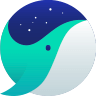
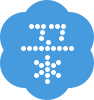

In [9]:
print(response.content)